# Introduction
* The dataset imported below was gathered from the CDC's open source data sets. The dataset is compiled for the 500 Cities project, and has data from 2016-2017. According to the website this data set has: " model-based small area estimates for 27 measures of chronic disease related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (9). Data were provided by the Centers for Disease Control and Prevention (CDC), Division of Population Health, Epidemiology and Surveillance Branch. The project was funded by the Robert Wood Johnson Foundation (RWJF) in conjunction with the CDC Foundation. It represents a first-of-its kind effort to release information on a large scale for cities and for small areas within those cities. It includes estimates for the 500 largest US cities and approximately 28,000 census tracts within these cities. These estimates can be used to identify emerging health problems and to inform development and implementation of effective, targeted public health prevention activities. Because the small area model cannot detect effects due to local interventions, users are cautioned against using these estimates for program or policy evaluations. Data sources used to generate these measures include Behavioral Risk Factor Surveillance System (BRFSS) data (2017, 2016), Census Bureau 2010 census population data, and American Community Survey (ACS) 2013-2017, 2012-2016 estimates. Because some questions are only asked every other year in the BRFSS, there are 7 measures (all teeth lost, dental visits, mammograms, pap tests, colorectal cancer screening, core preventive services among older adults, and sleep less than 7 hours) from the 2016 BRFSS that are the same in the 2019 release as the previous 2018 release".
* I've narrowed the data down to 2 cities (Alexandria, VA & Washington, D.C.) for the sake of this project. The file would have been too big otherwise. 
* Dataset Link: 
    * https://data.cdc.gov/500-Cities-Places/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq/about_data

In [408]:
# importing files and libraries 
import pandas as pd
import numpy as np # pd and np allow for access to functions that allow for more numerical analysis 
from matplotlib import pyplot  # for data visualization
import seaborn  # for data visualization

# import csv file (comma separated value file) 
df = pd.read_csv('https://raw.githubusercontent.com/jfaruque/PUBH1142/main/DC_Alexandria_Chronic_Illness_Data.csv')

In [409]:
# sanity check: display first five rows of df
# delete sanity checks in portfolio later  
df.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,VA,Virginia,Alexandria,Census Tract,BRFSS,Prevention,5101000-51510200702,Taking medicine for high blood pressure contro...,%,...,65.9,NaN,NaN,3910,"(38.8012387817, -77.0668298261)",PREVENT,BPMED,5101000,5.151020e+10,Taking BP Medication
1,2017,VA,Virginia,Alexandria,City,BRFSS,Health Outcomes,5101000,Current asthma among adults aged >=18 Years,%,...,8.9,NaN,NaN,139966,"(38.8187351557, -77.0867762661)",HLTHOUT,CASTHMA,5101000,NaN,Current Asthma
2,2017,VA,Virginia,Alexandria,Census Tract,BRFSS,Health Outcomes,5101000-51510201300,Diagnosed diabetes among adults aged >=18 Years,%,...,6.2,NaN,NaN,3105,"(38.8235664971, -77.0544032467)",HLTHOUT,DIABETES,5101000,5.151020e+10,Diabetes
3,2016,VA,Virginia,Alexandria,City,BRFSS,Prevention,5101000,Papanicolaou smear use among adult women aged ...,%,...,87.0,NaN,NaN,139966,"(38.8187351557, -77.0867762661)",PREVENT,PAPTEST,5101000,NaN,Pap Smear Test
4,2016,VA,Virginia,Alexandria,Census Tract,BRFSS,Unhealthy Behaviors,5101000-51510200801,Sleeping less than 7 hours among adults aged >...,%,...,28.8,NaN,NaN,2553,"(38.8165993378, -77.0808788508)",UNHBEH,SLEEP,5101000,5.151020e+10,Sleep <7 hours


## Data Wrangling & Analysis

In [410]:
# use the shape attribute to get the number of rows and columns in the dataframe
df.shape

(6185, 24)

Clearly, with these dimesions the sheer volume of data can seem overwhelming. Using the info() method can help dissect all that data for you. The summary output lists the number of columns, their respective labels, along with non-null count and type. Note that becuase there are 6,185 rows overall, non-null counts below this value indicate discrepencies in the data.

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        6185 non-null   int64  
 1   StateAbbr                   6185 non-null   object 
 2   StateDesc                   6185 non-null   object 
 3   CityName                    6185 non-null   object 
 4   GeographicLevel             6185 non-null   object 
 5   DataSource                  6185 non-null   object 
 6   Category                    6185 non-null   object 
 7   UniqueID                    6185 non-null   object 
 8   Measure                     6185 non-null   object 
 9   Data_Value_Unit             6185 non-null   object 
 10  DataValueTypeID             6185 non-null   object 
 11  Data_Value_Type             6185 non-null   object 
 12  Data_Value                  6160 non-null   float64
 13  Low_Confidence_Limit        6160 

* In order to get a better feel for what your data is supposed to represent, it is good to get an overview of what unique values constitute each column 
* Use the unique() method to achieve this 
* Low_Confidence_Limit and High_Confidence_Limit refers to the critical points calculated for the row 
* Columns 1,2,3,4,18,21, & 22 all concern location 

In [412]:
df.Year.unique()

array([2017, 2016])

In [413]:
df.StateAbbr.unique()

array(['VA', 'DC'], dtype=object)

In [414]:
df.CityName.unique()

array(['Alexandria', 'Washington'], dtype=object)

In [415]:
df.DataSource.unique()

array(['BRFSS'], dtype=object)

In [416]:
df.Category.unique()

array(['Prevention', 'Health Outcomes', 'Unhealthy Behaviors'],
      dtype=object)

In [417]:
df.Measure.unique()

array(['Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure',
       'Current asthma among adults aged >=18 Years',
       'Diagnosed diabetes among adults aged >=18 Years',
       'Papanicolaou smear use among adult women aged 21–65 Years',
       'Sleeping less than 7 hours among adults aged >=18 Years',
       'Chronic obstructive pulmonary disease among adults aged >=18 Years',
       'Cholesterol screening among adults aged >=18 Years',
       'Physical health not good for >=14 days among adults aged >=18 Years',
       'Mammography use among women aged 50–74 Years',
       'No leisure-time physical activity among adults aged >=18 Years',
       'Stroke among adults aged >=18 Years',
       'Current lack of health insurance among adults aged 18–64 Years',
       'All teeth lost among adults aged >=65 Years',
       'High blood pressure among adults aged >=18 Years',
       'Older adult men aged >=65 Years who are up to date on a co

In [418]:
df.Short_Question_Text.unique()

array(['Taking BP Medication', 'Current Asthma', 'Diabetes',
       'Pap Smear Test', 'Sleep <7 hours', 'COPD',
       'Cholesterol Screening', 'Physical Health', 'Mammography',
       'Physical Inactivity', 'Stroke', 'Health Insurance', 'Teeth Loss',
       'High Blood Pressure', 'Core preventive services for older men',
       'Annual Checkup', 'Dental Visit', 'Obesity', 'High Cholesterol',
       'Binge Drinking', 'Coronary Heart Disease',
       'Chronic Kidney Disease', 'Current Smoking', 'Arthritis',
       'Mental Health', 'Core preventive services for older women',
       'Colorectal Cancer Screening', 'Cancer (except skin)'],
      dtype=object)

In [419]:
df.Data_Value_Unit.unique()

array(['%'], dtype=object)

In [420]:
df.DataValueTypeID.unique()

array(['CrdPrv', 'AgeAdjPrv'], dtype=object)

In [421]:
df.Data_Value_Type.unique()

array(['Crude prevalence', 'Age-adjusted prevalence'], dtype=object)

Note that this column shows that crude prevalence and age-adjusted prevalence were measured for chronic illnesses. Crude prevalence is based on the number of new cases in a popualtion. Age-adjusted prevalence is calculated 

In [422]:
# 25 non-null value for Data_Value_Type
df.Data_Value_Footnote.unique()

array([nan, 'Estimates suppressed for population less than 50',
       'Data not available for this state from the 2016 BRFSS'],
      dtype=object)

In [423]:
#25 non-null value for this column as well
df.Data_Value_Footnote_Symbol.unique()

array([nan, '*', '~'], dtype=object)

In [424]:
df.CityFIPS.unique()

array([5101000, 1150000])

In [425]:
# note that there are 6073 non-null values in this column instead of 6185
df.TractFIPS.unique()

array([5.15102007e+10,            nan, 5.15102013e+10, 5.15102008e+10,
       5.15102003e+10, 5.15102006e+10, 5.15102004e+10, 5.15102001e+10,
       5.15102004e+10, 5.15102003e+10, 5.15102012e+10, 5.15102018e+10,
       5.15102010e+10, 5.15102019e+10, 5.15102001e+10, 5.15102012e+10,
       5.15102011e+10, 5.15102020e+10, 5.15102002e+10, 5.15102005e+10,
       5.15102001e+10, 5.15102020e+10, 5.15102009e+10, 5.15102018e+10,
       5.15102001e+10, 5.15102007e+10, 5.15102014e+10, 5.15102001e+10,
       5.15102002e+10, 5.15102016e+10, 5.15102007e+10, 5.15102003e+10,
       5.15102004e+10, 5.15102004e+10, 5.15102015e+10, 5.15102008e+10,
       5.15102012e+10, 5.15102001e+10, 5.15102004e+10, 1.10010110e+10,
       1.10010108e+10, 1.10010007e+10, 1.10010080e+10, 1.10010004e+10,
       1.10010028e+10, 1.10010095e+10, 1.10010050e+10, 1.10010036e+10,
       1.10010095e+10, 1.10010084e+10, 1.10010078e+10, 1.10010073e+10,
       1.10010098e+10, 1.10010049e+10, 1.10010040e+10, 1.10010079e+10,
      

### Data Filtering and Extraction

In [426]:
# replace cells with null values especially for TrackNIPS column
pd.read_csv('https://raw.githubusercontent.com/jfaruque/PUBH1142/main/DC_Alexandria_Chronic_Illness_Data.csv', na_values=[999, 'Nil', 'Missing'])

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,VA,Virginia,Alexandria,Census Tract,BRFSS,Prevention,5101000-51510200702,Taking medicine for high blood pressure contro...,%,...,65.9,NaN,NaN,3910,"(38.8012387817, -77.0668298261)",PREVENT,BPMED,5101000,5.151020e+10,Taking BP Medication
1,2017,VA,Virginia,Alexandria,City,BRFSS,Health Outcomes,5101000,Current asthma among adults aged >=18 Years,%,...,8.9,NaN,NaN,139966,"(38.8187351557, -77.0867762661)",HLTHOUT,CASTHMA,5101000,NaN,Current Asthma
2,2017,VA,Virginia,Alexandria,Census Tract,BRFSS,Health Outcomes,5101000-51510201300,Diagnosed diabetes among adults aged >=18 Years,%,...,6.2,NaN,NaN,3105,"(38.8235664971, -77.0544032467)",HLTHOUT,DIABETES,5101000,5.151020e+10,Diabetes
3,2016,VA,Virginia,Alexandria,City,BRFSS,Prevention,5101000,Papanicolaou smear use among adult women aged ...,%,...,87.0,NaN,NaN,139966,"(38.8187351557, -77.0867762661)",PREVENT,PAPTEST,5101000,NaN,Pap Smear Test
4,2016,VA,Virginia,Alexandria,Census Tract,BRFSS,Unhealthy Behaviors,5101000-51510200801,Sleeping less than 7 hours among adults aged >...,%,...,28.8,NaN,NaN,2553,"(38.8165993378, -77.0808788508)",UNHBEH,SLEEP,5101000,5.151020e+10,Sleep <7 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6180,2017,DC,District of C,Washington,Census Tract,BRFSS,Prevention,1150000-11001005800,Cholesterol screening among adults aged >=18 Y...,%,...,82.2,NaN,NaN,2830,"(38.8978732774, -77.0250007021)",PREVENT,CHOLSCREEN,1150000,1.100101e+10,Cholesterol Screening
6181,2017,DC,District of C,Washington,Census Tract,BRFSS,Unhealthy Behaviors,1150000-11001004802,No leisure-time physical activity among adults...,%,...,24.9,NaN,NaN,2922,"(38.9062165422, -77.0188944239)",UNHBEH,LPA,1150000,1.100100e+10,Physical Inactivity
6182,2016,DC,District of C,Washington,Census Tract,BRFSS,Unhealthy Behaviors,1150000-11001003100,Sleeping less than 7 hours among adults aged >...,%,...,37.4,NaN,NaN,2885,"(38.9305897622, -77.0254222296)",UNHBEH,SLEEP,1150000,1.100100e+10,Sleep <7 hours
6183,2017,DC,District of C,Washington,Census Tract,BRFSS,Prevention,1150000-11001006801,Taking medicine for high blood pressure contro...,%,...,73.7,NaN,NaN,1949,"(38.8877299699, -76.9801035038)",PREVENT,BPMED,1150000,1.100101e+10,Taking BP Medication


The code below is going to get rid of the Data_Value_Footnote and Data_Value_Footnote_Symbol columns because there is a high amount of null values present in these columns. 

In [427]:
footnote = df['Data_Value_Footnote']
# Delete the Data_Value_Footnote column from df
df.drop(columns=['Data_Value_Footnote'], inplace=True)

In [428]:
footnote_sym = df['Data_Value_Footnote_Symbol']
# Delete the Data_Value_Footnote_Symbol column from df
df.drop(columns=['Data_Value_Footnote_Symbol'], inplace=True)

I also noticed that many of the columns presented the same data in a different form. This includes: 
* State Abbr vs State Desc
* Data Value Type ID vs Data Value Type
* Category vs Category ID
* Measure vs Measure ID
* I've opted to keep the columns with abbreviated data within their cells. Ideally, I would store a key of sorts that detail what each abbreaviation refers to. 

In [429]:
# delete state description column 
df.drop(columns=['StateDesc'], inplace=True)

In [430]:
# delete the data value type column 
df.drop(columns=['Data_Value_Type'], inplace=True)

In [431]:
# delete the category column 
df.drop(columns=['Category'], inplace=True)

In [432]:
# delete the Measure column
df.drop(columns=['Measure'], inplace=True)


I also got rid of the Data Value Unit and the Data Source columns because all of the cells under these columns had the same value respectively
* Data Source for every row was BRFSS
* Data Value Unit was all %

In [433]:
# delete the DataSource column 
df.drop(columns=['DataSource'], inplace=True)

In [434]:
# delete the Data_Value_Unit column 
df.drop(columns='Data_Value_Unit', inplace=True)

## Data Plotting/Visualization with Seaborn

In [436]:
#listing columns again for a refresher 
df.columns

Index(['Year', 'StateAbbr', 'CityName', 'GeographicLevel', 'UniqueID',
       'DataValueTypeID', 'Data_Value', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'PopulationCount', 'GeoLocation', 'CategoryID',
       'MeasureId', 'CityFIPS', 'TractFIPS', 'Short_Question_Text'],
      dtype='object')

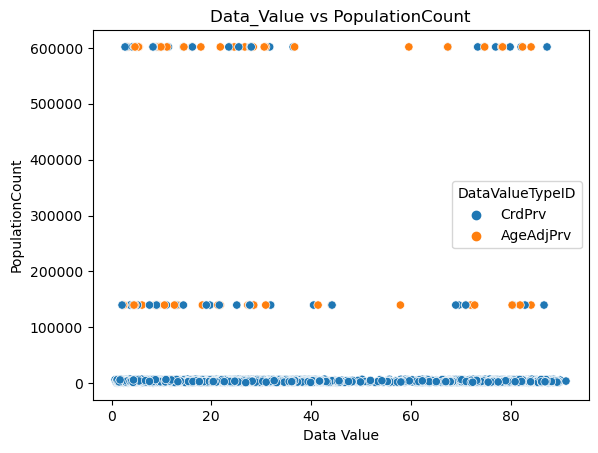

In [440]:
# libraries have been imported in first code cell
# generating a scatterplot representing the relationship between Data_Value and PopulationCount
# these are two continuous variables
# for this dataset, a scatterplot would not be the most insightful
# I set the hue as DataValueTypeID because the data values are wither crude rates or age-adjusted

seaborn.scatterplot (
    data=df,
    x='Data_Value',
    y='PopulationCount',
    hue='DataValueTypeID'
    ).set(
        title='Data_Value vs PopulationCount',
        xlabel='Data Value',
        ylabel='PopulationCount'
);

### Distribution Plots

/Users/jessicafaruque/miniconda3/envs/datascience/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


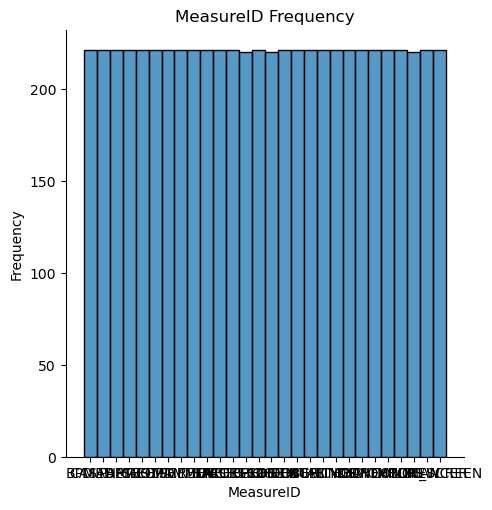

In [447]:
# histogram illustrating MeasureID frequqncy
# For reference MeasureID refers to the 7 measures listed in the Introduction
seaborn.displot(
    df,
    x='MeasureId',
    bins=range(0, 7000, 7000)
    ).set(
        title='MeasureID Frequency',
        xlabel='MeasureID',
        ylabel='Frequency'
);